In [76]:
import pandas as pd

In [77]:
df=pd.read_csv(r"C:\Users\HP\Desktop\SEM 7\capstone\SCM_MLOps\Data\Raw\new_retail_data.csv")
df.drop(columns=['Customer_ID', 'Name', 'Email', 'Phone', 'Address',
    'Zipcode','Age', 'Gender', 'Income','Year', 'Month','Time'],inplace=True)

In [78]:
df.columns

Index(['Transaction_ID', 'City', 'State', 'Country', 'Customer_Segment',
       'Date', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [79]:
df.isnull().sum()

Transaction_ID      333
City                248
State               281
Country             271
Customer_Segment    215
Date                359
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [80]:
df['Country'].unique()

array(['Germany', 'UK', 'Australia', 'Canada', 'USA', nan], dtype=object)

In [81]:
print(df['products'].nunique())
print(df['Product_Type'].unique()) #33
df['Product_Category'].unique() 

318
['Shorts' 'Tablet' "Children's" 'Tools' 'Chocolate' 'Television' 'Shirt'
 'Decorations' 'Non-Fiction' 'Water' 'Snacks' 'T-shirt' 'Literature'
 'Juice' 'Furniture' 'Coffee' 'Bathroom' 'Kitchen' 'Smartphone' 'Shoes'
 'Thriller' 'Soft Drink' 'Laptop' 'Dress' 'Headphones' 'Lighting'
 'Bedding' 'Jacket' 'Fiction' 'Jeans' 'Fridge'
 'Mitsubishi 1.5 Ton 3 Star Split AC' 'BlueStar AC']


array(['Clothing', 'Electronics', 'Books', 'Home Decor', 'Grocery', nan],
      dtype=object)

In [82]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
num_nat = df['Date'].isna().sum()
print("Number of NaT (unrecognized dates):", num_nat)

df = df.dropna(subset=['Date']).reset_index(drop=True)

print("Remaining rows after dropping NaT:", len(df))

Number of NaT (unrecognized dates): 359
Remaining rows after dropping NaT: 301651


In [83]:
df = df.dropna(subset=['State', 'Country','Total_Purchases'], how='any')

In [84]:

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date').reset_index(drop=True)
# 1-03-2023 to 29-02-2024
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day
df


,Transaction_ID,City,State,Country,Customer_Segment,Date,Total_Purchases,Amount,Total_Amount,Product_Category,...,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,year,month,day
0,4807893.0,Portsmouth,England,UK,Regular,2023-03-01,2.0,33.091951,66.183903,Electronics,...,Tablet,Good,Express,Cash,Delivered,4.0,Google Pixel Slate,2023,3,1
1,8777752.0,Edinburgh,England,UK,New,2023-03-01,6.0,391.126445,2346.758669,Grocery,...,Snacks,Excellent,Same-Day,Debit Card,Delivered,4.0,Chips,2023,3,1
2,9824954.0,Frankfurt,Berlin,Germany,Regular,2023-03-01,7.0,124.941986,874.593902,Books,...,Fiction,Bad,Express,PayPal,Delivered,1.0,Dystopian,2023,3,1
3,5751090.0,Boston,Georgia,USA,Regular,2023-03-01,5.0,43.961019,219.805097,Clothing,...,Shorts,Bad,Same-Day,PayPal,Delivered,1.0,Denim shorts,2023,3,1
4,4449254.0,Jacksonville,Illinois,USA,Regular,2023-03-01,1.0,369.678061,369.678061,Home Decor,...,Furniture,Good,Same-Day,Credit Card,Processing,4.0,Dining table,2023,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300737,2361949.0,Portsmouth,England,UK,Regular,2024-02-29,8.0,28.457530,227.660244,Clothing,...,Shirt,Bad,Standard,Debit Card,Delivered,1.0,Tank top,2024,2,29
300738,7008699.0,Canberra,New South Wales,Australia,New,2024-02-29,10.0,379.530992,3795.309924,Clothing,...,Shoes,Bad,Standard,Debit Card,Processing,1.0,Oxfords,2024,2,29
300739,3938508.0,Frankfurt,Berlin,Germany,Regular,2024-02-29,3.0,335.963161,1007.889483,Books,...,Non-Fiction,Bad,Standard,Debit Card,Delivered,1.0,Cooking,2024,2,29
300740,1658044.0,Stuttgart,Berlin,Germany,Premium,2024-02-29,4.0,434.916519,1739.666076,Electronics,...,Mitsubishi 1.5 Ton 3 Star Split AC,Good,Express,Cash,Delivered,4.0,Split AC,2024,2,29


In [85]:
monthly_data=(
    df.groupby(['Country','State','products','year','month'])['Total_Purchases']
    .sum().reset_index()
    .sort_values(by=['Country','State','products','year','month'])
)
monthly_data

,Country,State,products,year,month,Total_Purchases
0,Australia,New South Wales,4K TV,2023,3,115.0
1,Australia,New South Wales,4K TV,2023,4,41.0
2,Australia,New South Wales,4K TV,2023,5,69.0
3,Australia,New South Wales,4K TV,2023,6,73.0
4,Australia,New South Wales,4K TV,2023,7,91.0
...,...,...,...,...,...,...
66180,USA,Wyoming,iPad,2023,4,8.0
66181,USA,Wyoming,iPad,2023,9,3.0
66182,USA,Wyoming,iPhone,2023,4,10.0
66183,USA,Wyoming,iPhone,2023,5,4.0


In [101]:
import os
os.makedirs("data/processed", exist_ok=True)
monthly_data.to_csv("Data/Processed/monthly_data.csv", index=False)

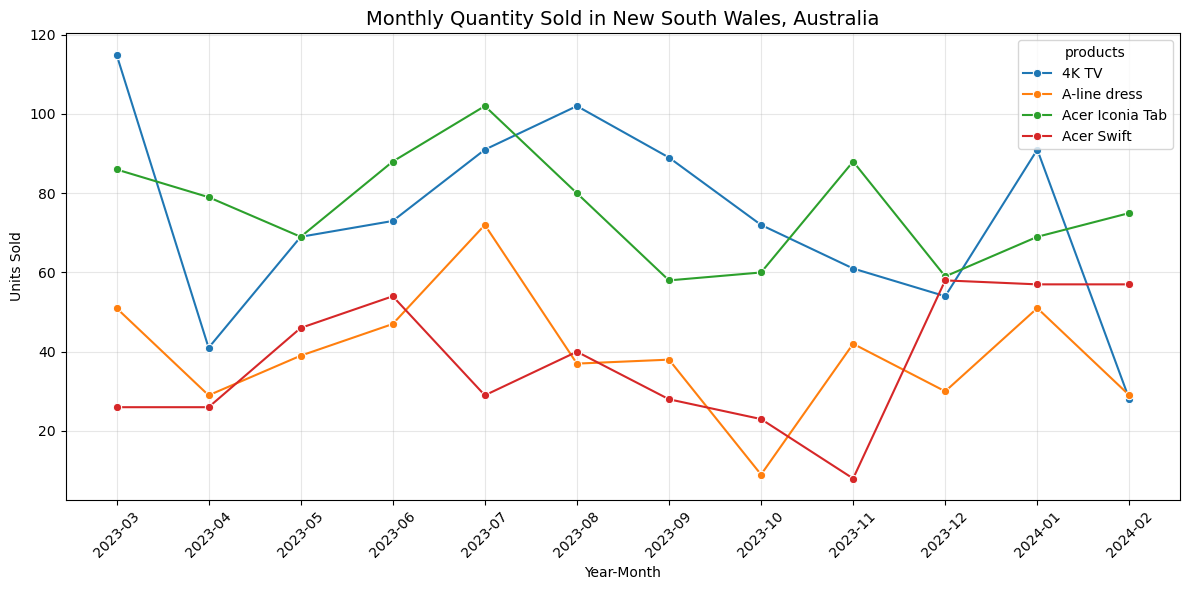

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data for Australia → New South Wales and for selected products
filtered_df = monthly_data[
    (monthly_data['Country'] == 'Australia') &
    (monthly_data['products'].isin(['4K TV', 'A-line dress','Acer Iconia Tab','Acer Swift']))
]

# Group by product, year, and month
monthly_sales = (
    filtered_df.groupby(['products', 'year', 'month'])['Total_Purchases']
    .sum()
    .reset_index()
    .sort_values(['products', 'year', 'month'])
)

# Create combined Year-Month column
monthly_sales['year_month'] = (
    monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str).str.zfill(2)
)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_sales,
    x='year_month',
    y='Total_Purchases',
    hue='products',
    marker='o'
)

plt.title('Monthly Quantity Sold in New South Wales, Australia', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [87]:
df.groupby(['Country'])['Transaction_ID'].count()

Country
Australia    45106
Canada       45097
Germany      52597
UK           62795
USA          94815
Name: Transaction_ID, dtype: int64

In [ ]:
lags = [1, 2, 3, 4, 6]

for lag in lags:
    monthly_data[f'lag_{lag}'] = (
        monthly_data['Total_Purchases']
        .shift(lag)
    )

monthly_data = monthly_data.dropna(subset=[f'lag_{l}' for l in lags])

monthly_data = monthly_data.reset_index(drop=True)

monthly_data.head(15)


,Country,State,products,year,month,Total_Purchases,lag_1,lag_2,lag_3,lag_4,lag_6
0,Australia,New South Wales,4K TV,2023,3,115.0,NaN,NaN,NaN,NaN,NaN
1,Australia,New South Wales,4K TV,2023,4,41.0,115.0,NaN,NaN,NaN,NaN
2,Australia,New South Wales,4K TV,2023,5,69.0,41.0,115.0,NaN,NaN,NaN
3,Australia,New South Wales,4K TV,2023,6,73.0,69.0,41.0,115.0,NaN,NaN
4,Australia,New South Wales,4K TV,2023,7,91.0,73.0,69.0,41.0,115.0,NaN
5,Australia,New South Wales,4K TV,2023,8,102.0,91.0,73.0,69.0,41.0,NaN
6,Australia,New South Wales,4K TV,2023,9,89.0,102.0,91.0,73.0,69.0,115.0
7,Australia,New South Wales,4K TV,2023,10,72.0,89.0,102.0,91.0,73.0,41.0
8,Australia,New South Wales,4K TV,2023,11,61.0,72.0,89.0,102.0,91.0,69.0
9,Australia,New South Wales,4K TV,2023,12,54.0,61.0,72.0,89.0,102.0,73.0


In [93]:
monthly_data['rolling_mean_3'] = (
    monthly_data.groupby(['Country', 'State', 'products'])['Total_Purchases']
    .transform(lambda x: x.shift(1).rolling(3).mean())
)


In [98]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming your lag features are already added
lags = [1, 2, 3, 4, 6]

# Features and target
X = monthly_data[['lag_1','lag_2','lag_3','lag_4','lag_6','year','month']]
y = monthly_data['Total_Purchases']

# Optional: you can also add year, month, or product info as features
# X['month'] = monthly_data['month']
# X['year'] = monthly_data['year']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# ---- Train XGBoost model ----
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

results = X_test.copy()
results['Actual'] = y_test.values
results['Predicted'] = y_pred
print(results.head(10))
accuracy = 100 - ((mae / y.mean()) * 100)
print(f"Approx. Model Accuracy: {accuracy:.2f}%")


MAE: 3.22
RMSE: 4.06
       lag_1  lag_2  lag_3  lag_4  lag_6  year  month  Actual  Predicted
52948    7.0    1.0    6.0    5.0    5.0  2023      5     5.0   6.157699
52949    5.0    7.0    1.0    6.0    9.0  2023      8     5.0   6.087162
52950    5.0    5.0    7.0    1.0    5.0  2023      9     6.0   6.027515
52951    6.0    5.0    5.0    7.0    6.0  2023     11     8.0   6.007682
52952    8.0    6.0    5.0    5.0    1.0  2024      2     9.0   6.036026
52953    9.0    8.0    6.0    5.0    7.0  2023      4     3.0   6.691059
52954    3.0    9.0    8.0    6.0    5.0  2023      5     7.0   6.236465
52955    7.0    3.0    9.0    8.0    5.0  2023      7     2.0   6.178648
52956    2.0    7.0    3.0    9.0    6.0  2023      9     1.0   6.213491
52957    1.0    2.0    7.0    3.0    8.0  2024      2     6.0   6.013874
Approx. Model Accuracy: 86.80%


In [97]:
print("\n--- Model Diagnostics ---")
print(f"Mean of target: {y.mean():.2f}")
print(f"MAE as % of mean: {(mae / y.mean()) * 100:.2f}%")
print(f"RMSE as % of mean: {(rmse / y.mean()) * 100:.2f}%")

# Compare to naive last-month prediction
naive_pred = X_test['lag_1']
naive_mae = mean_absolute_error(y_test, naive_pred)
naive_rmse = np.sqrt(mean_squared_error(y_test, naive_pred))

print(f"\nNaive MAE: {naive_mae:.2f}")
print(f"Naive RMSE: {naive_rmse:.2f}")

if mae < naive_mae:
    print("✅ Model performs better than naive baseline.")
else:
    print("⚠️ Model underperforms compared to naive baseline.")



--- Model Diagnostics ---
Mean of target: 24.36
MAE as % of mean: 13.20%
RMSE as % of mean: 16.66%

Naive MAE: 4.11
Naive RMSE: 5.37
✅ Model performs better than naive baseline.
